In [119]:
# Importação dos pacotes necessários
    
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

In [120]:
df_gera = pd.read_csv('db_balanco_temp_geracao.csv', delimiter=',', encoding="utf-8")
df_gera.head()

#Características das variáveis do dataset
df_gera.info()

#Estatísticas univariadas
df_gera.describe()

#Checando missing values
missing = df_gera.isna().any()
print("Columns with missing values:")
print(missing)

,data,mean,temp_arg,temp_arg_max,temp_arg_min
0,2020-05-01,11726.041667,14.7,19.600000,9.800000
1,2020-05-02,12322.250000,12.7,16.933333,8.466667
2,2020-05-03,11483.250000,16.2,21.600000,10.800000
3,2020-05-04,13317.416667,13.7,18.266667,9.133333
4,2020-05-05,13904.625000,13.3,17.733333,8.866667


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data          1198 non-null   object 
 1   mean          1198 non-null   float64
 2   temp_arg      1198 non-null   float64
 3   temp_arg_max  1197 non-null   float64
 4   temp_arg_min  1197 non-null   float64
dtypes: float64(4), object(1)
memory usage: 46.9+ KB


,mean,temp_arg,temp_arg_max,temp_arg_min
count,1198.000000,1198.000000,1197.000000,1197.000000
mean,16652.506847,16.923957,21.813478,11.285102
std,2423.024560,6.478644,8.106496,4.320059
min,0.000000,3.300000,4.400000,2.200000
25%,14978.510417,11.700000,15.200000,7.800000
50%,16328.812500,16.750000,20.533333,11.200000
75%,18029.333333,21.675000,27.866667,14.466667
max,24413.708333,34.500000,46.000000,23.000000


Columns with missing values:
data            False
mean            False
temp_arg        False
temp_arg_max     True
temp_arg_min     True
dtype: bool


In [121]:
#Verificamos presença de missing values e valures nulos no dataset

#removendo missing values
df_gera.dropna(inplace=True)

#removendo valores nulos
df_gera = df_gera[df_gera['mean'] != 0]

df_gera.describe()


,mean,temp_arg,temp_arg_max,temp_arg_min
count,1197.000000,1197.000000,1197.000000,1197.000000
mean,16666.418716,16.927652,21.813478,11.285102
std,2375.689801,6.480089,8.106496,4.320059
min,3482.166667,3.300000,4.400000,2.200000
25%,14979.166667,11.700000,15.200000,7.800000
50%,16331.750000,16.800000,20.533333,11.200000
75%,18031.000000,21.700000,27.866667,14.466667
max,24413.708333,34.500000,46.000000,23.000000


In [122]:
# Removing anomalies from the dataframe

# Calculate the z-score for the 'mean' column
z_scores = (df_gera['mean'] - df_gera['mean'].mean()) / df_gera['mean'].std()

# Define a threshold for the z-score to identify outliers
threshold = 1.5

# Filter out the rows where the z-score is above the threshold
df_gera = df_gera[z_scores.abs() < threshold]

# Check the updated statistics of the dataframe
df_gera.describe()

,mean,temp_arg,temp_arg_max,temp_arg_min
count,1048.000000,1048.000000,1048.000000,1048.000000
mean,16355.386087,16.338073,21.207570,10.892048
std,1691.798890,5.889275,7.558642,3.926184
min,13117.625000,3.300000,4.400000,2.200000
25%,15008.875000,11.600000,15.066667,7.733333
50%,16210.375000,16.100000,20.000000,10.733333
75%,17562.114583,20.900000,27.333333,13.933333
max,20224.166667,32.700000,39.733333,21.800000


In [123]:
# Gráfico 3D com scatter

import plotly.io as pio
pio.renderers.default = 'browser'

trace = go.Scatter3d(
    x=df_gera['temp_arg'], 
    y=df_gera['temp_arg_max'], 
    z=df_gera['temp_arg_min'], 
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800,
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.update_layout(scene = dict(
                        xaxis_title='temp_arg',
                        yaxis_title='temp_arg_max',
                        zaxis_title='temp_arg_min'))
#plot_figure.show()

,mean,temp_arg,temp_arg_max,temp_arg_min
mean,1.000000,0.036038,0.052839,0.036038
temp_arg,0.036038,1.000000,0.929703,1.000000
temp_arg_max,0.052839,0.929703,1.000000,0.929703
temp_arg_min,0.036038,1.000000,0.929703,1.000000


<Figure size 1080x720 with 0 Axes>

<AxesSubplot:>

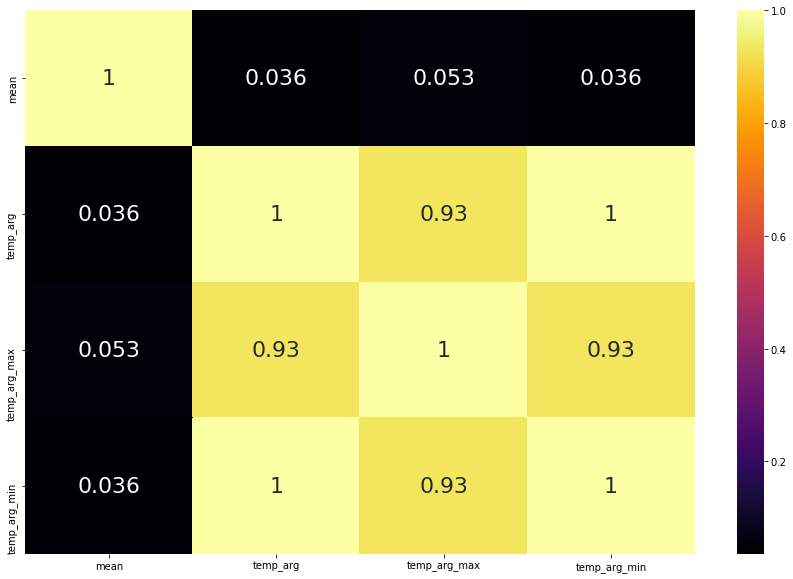

In [124]:
# Matriz de correlações
#dropando coluna date
df_corr = df_gera.drop(columns='data')
# Calculate the correlation matrix
corr = df_corr.corr()
corr

plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(), annot=True, cmap = plt.cm.inferno,
            annot_kws={'size':22})
plt.show()

"temp_arg" e "temp_arg_min" com correlação perfeita. Um dos dois pode ser excluído do modelo

In [125]:
# Estimando um modelo múltiplo com as variáveis do dataset 'paises'

#Estimando a regressão múltipla
modelo_OLS = sm.OLS.from_formula("mean ~ temp_arg + temp_arg_max", df_gera).fit()

#Parâmetros do modelo
modelo_OLS.summary()

#Parâmetros do modelo com intervalos de confiança
#Nível de significância de 5% / Nível de confiança de 95%
modelo_OLS.conf_int(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.127
Date:                Sat, 19 Aug 2023   Prob (F-statistic):              0.120
Time:                        06:17:18   Log-Likelihood:                -9274.8
No. Observations:                1048   AIC:                         1.856e+04
Df Residuals:                    1045   BIC:                         1.857e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.613e+04    157.325    102.537      0.000    1.58e+04    1.64e+04
temp_arg       -27.7122     24.079     -1.151      0.250     -74.960      19.536
temp_arg_max    31.9004     18.761      1.700      0.089      -4.913      68.714
==============================================================================
Omnibus:                       73.262   Durbin-Watson:                   0.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.899
Skew:                           0.270   Prob(JB):                     1.60e-08
Kurtosis:                       2.272   Cond. No.                         85.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,0,1
Intercept,15822.908966,16440.328371
temp_arg,-74.960236,19.535903
temp_arg_max,-4.912642,68.713520


## temp_arg_max não estatísticamente significante como uma variável explicativa. Então vamos excluí-lo

In [126]:
#Estimando a regressão múltipla
modelo_OLS = sm.OLS.from_formula("mean ~ temp_arg", df_gera).fit()

#Parâmetros do modelo
modelo_OLS.summary()

#Parâmetros do modelo com intervalos de confiança
#Nível de significância de 5% / Nível de confiança de 95%
modelo_OLS.conf_int(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.360
Date:                Sat, 19 Aug 2023   Prob (F-statistic):              0.244
Time:                        06:17:27   Log-Likelihood:                -9276.2
No. Observations:                1048   AIC:                         1.856e+04
Df Residuals:                    1046   BIC:                         1.857e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.619e+04    154.150    105.004      0.000    1.59e+04    1.65e+04
temp_arg      10.3526      8.876      1.166      0.244      -7.065      27.770
==============================================================================
Omnibus:                       75.713   Durbin-Watson:                   0.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.308
Skew:                           0.268   Prob(JB):                     1.31e-08
Kurtosis:                       2.263   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,0,1
Intercept,15883.767531,16488.722754
temp_arg,-7.065093,27.770222


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

Text(0.5, 1.0, 'Dispersão dos dados modelo OLS')

Text(0.5, 0, 'Temperatura (Cº)')

Text(0, 0.5, 'Carga (mWe)')

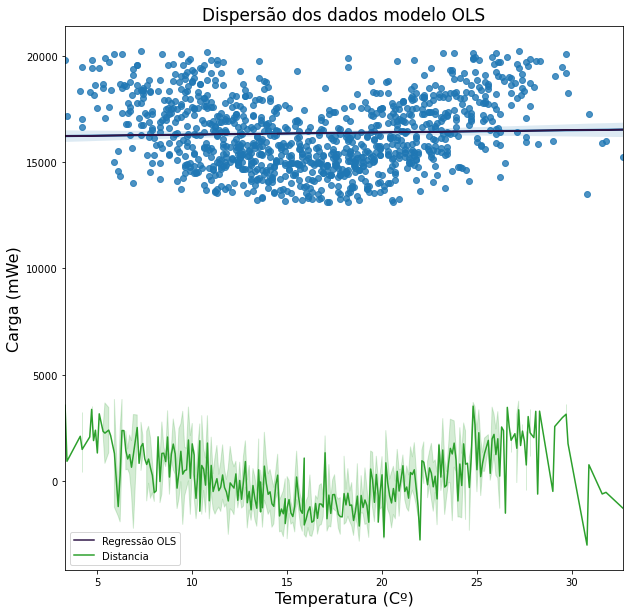

In [149]:
#Plotando gráfico de dispersão com o modelo OLS
plt.figure(figsize=(10,10))
sns.regplot(x="temp_arg", y="mean", data=df_gera,)
plt.plot(df_gera['temp_arg'].to_numpy(), modelo_OLS.fittedvalues.to_numpy(), color='#2e1547', label='Regressão OLS')
sns.lineplot(x=df_gera['temp_arg'].to_numpy(), y=df_gera['mean'].to_numpy() - modelo_OLS.fittedvalues.to_numpy(), color='#2ca02c', label='Distancia')
plt.title('Dispersão dos dados modelo OLS', fontsize=17)
plt.xlabel('Temperatura (Cº)', fontsize=16)
plt.ylabel('Carga (mWe)', fontsize=16)
plt.show()

In [128]:
# Transformação de Box-Cox

#Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

#xt é uma variável que traz os valores transformados (Y*)
#'lmbda' é o lambda de Box-Cox
xt, lmbda = boxcox(df_gera['mean'])

print("Primeiros valores: ",xt[:5])
print("Lambda: ",lmbda)

Primeiros valores:  [2.43473432 2.43567744 2.43689407 2.43710663 2.43682079]
Lambda:  -0.4016670951052653


In [129]:
df_gera['bc_mean'] = xt
df_gera

,data,mean,temp_arg,temp_arg_max,temp_arg_min,bc_mean
3,2020-05-04,13317.416667,13.7,18.266667,9.133333,2.434734
4,2020-05-05,13904.625000,13.3,17.733333,8.866667,2.435677
5,2020-05-06,14717.125000,10.9,14.533333,7.266667,2.436894
6,2020-05-07,14865.875000,12.4,16.533333,8.266667,2.437107
7,2020-05-08,14666.333333,13.4,17.866667,8.933333,2.436821
...,...,...,...,...,...,...
1192,2023-08-06,14927.958333,15.5,21.000000,10.333333,2.437194
1193,2023-08-07,17602.625000,10.0,12.000000,6.666667,2.440553
1194,2023-08-08,17595.833333,11.0,14.000000,7.333333,2.440545
1195,2023-08-09,18150.958333,13.0,15.000000,8.666667,2.441154


In [130]:
# Estimando um novo modelo múltiplo com variável dependente
#transformada por Box-Cox

modelo_bc = sm.OLS.from_formula('bc_mean ~  temp_arg', df_gera).fit()

# Parâmetros do modelo
modelo_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bc_mean   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.258
Date:                Sat, 19 Aug 2023   Prob (F-statistic):              0.262
Time:                        06:17:38   Log-Likelihood:                 4979.3
No. Observations:                1048   AIC:                            -9955.
Df Residuals:                    1046   BIC:                            -9945.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4387      0.000   1.28e+04      0.000       2.438       2.439
temp_arg    1.232e-05    1.1e-05      1.122      0.262   -9.23e-06    3.39e-05
==============================================================================
Omnibus:                       82.660   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.514
Skew:                           0.011   Prob(JB):                     1.06e-06
Kurtosis:                       2.207   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## temp_arg_max não estatísticamente significante como uma variável explicativa. Então vamos excluí-lo

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

Text(0.5, 1.0, 'Dispersão dos dados modelo Box-Cox')

Text(0.5, 0, 'Temperatura (Cº)')

Text(0, 0.5, 'Carga (mWe)')

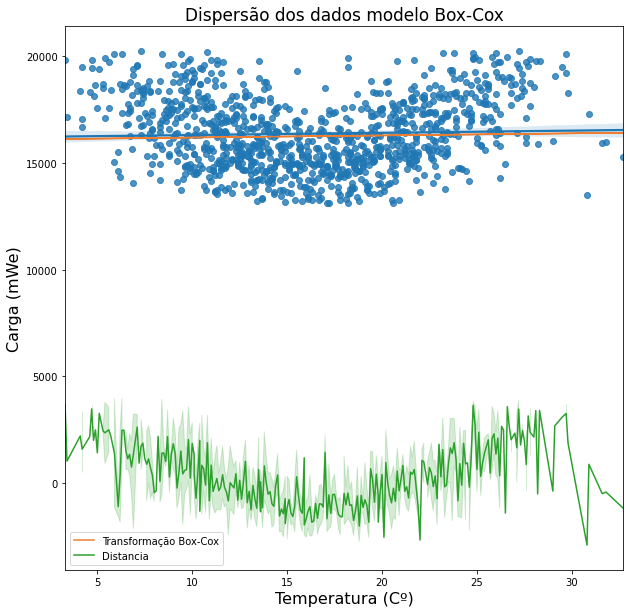

In [147]:
#Plotando gráfico de dispersão com o modelo BoxCox

Ybc = (modelo_bc.fittedvalues.to_numpy()* lmbda + 1) ** (1 / lmbda)

plt.figure(figsize=(10, 10))
sns.regplot(x="temp_arg", y="mean", data=df_gera)
plt.plot(df_gera['temp_arg'].to_numpy(), Ybc, color='#ed7d31', label='Transformação Box-Cox')
sns.lineplot(x=df_gera['temp_arg'].to_numpy(), y=df_gera['mean'].to_numpy() - Ybc, color='#2ca02c', label='Distancia')
plt.legend()
plt.title('Dispersão dos dados modelo Box-Cox', fontsize=17)
plt.xlabel('Temperatura (Cº)', fontsize=16)
plt.ylabel('Carga (mWe)', fontsize=16)
plt.show()

In [132]:
# Resumo dos dois modelos obtidos pelo procedimento Stepwise
#(linear e com Box-Cox)

summary_col([modelo_OLS, modelo_bc],
            model_names=["OLS","BOX-COX"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,OLS,BOX-COX
Intercept,16186.2451***,2.4387***
,(154.1496),(0.0002)
temp_arg,10.3526,0.0000
,(8.8764),(0.0000)
R-squared,0.0013,0.0012
R-squared Adj.,0.0003,0.0002
N,1048,1048


In [133]:
# In[ ]: Não podemos nos esquecer de fazer o cálculo para a obtenção do fitted
#value de Y (retorno)

#Não podemos nos esquecer de fazer o cálculo para a obtenção do fitted value de Y (retorno)
#(fitted * lmbda + 1) ** (1 / lmbda)


# In[ ]: Salvando os fitted values de 'modelo_step_empresas' e
#'modelo_step_empresas_bc'

df_gera['yhat_OLS'] = modelo_OLS.fittedvalues
df_gera['yhat_bc'] = (modelo_bc.fittedvalues* lmbda + 1) ** (1 / lmbda)

#Visualizando os dois fitted values no dataset
#modelos 'modelo_step_empresas e modelo_step_empresas_bc
df_gera[['data','mean','yhat_OLS','yhat_bc']]

,data,mean,yhat_OLS,yhat_bc
3,2020-05-04,13317.416667,16328.075272,16208.389133
4,2020-05-05,13904.625000,16323.934247,16204.470451
5,2020-05-06,14717.125000,16299.088092,16180.986223
6,2020-05-07,14865.875000,16314.616939,16195.658270
7,2020-05-08,14666.333333,16324.969503,16205.449997
...,...,...,...,...
1192,2023-08-06,14927.958333,16346.709888,16226.039650
1193,2023-08-07,17602.625000,16289.770785,16172.191936
1194,2023-08-08,17595.833333,16300.123349,16181.963780
1195,2023-08-09,18150.958333,16320.828477,16201.532311


In [142]:
# Preparar dados para modelo OLS quadratico
xdata = df_gera['temp_arg']
ydata = df_gera['mean']


# Create a DataFrame for the statsmodels OLS
data = {'ydata': ydata, 'xdata': xdata}
df = pd.DataFrame(data)

# Fit the OLS model using statsmodels
modelo_qd = sm.OLS.from_formula('ydata ~ xdata + np.power(xdata, 2)', data=df).fit()
# Parâmetros do modelo
modelo_qd.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ydata   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     151.9
Date:                Sat, 19 Aug 2023   Prob (F-statistic):           1.21e-58
Time:                        06:26:35   Log-Likelihood:                -9143.2
No. Observations:                1048   AIC:                         1.829e+04
Df Residuals:                    1045   BIC:                         1.831e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            2.14e+04    329.347     64.980      0.000    2.08e+04     2.2e+04
xdata               -699.9791     41.610    -16.823      0.000    -781.627    -618.331
np.power(xdata, 2)    21.1900      1.219     17.381      0.000      18.798      23.582
==============================================================================
Omnibus:                        0.574   Durbin-Watson:                   0.723
Prob(Omnibus):                  0.750   Jarque-Bera (JB):                0.477
Skew:                           0.043   Prob(JB):                        0.788
Kurtosis:                       3.060   Cond. No.                     2.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

Text(0.5, 1.0, 'Dados dispersos - modelo quadrático')

Text(0.5, 0, 'Temperatura (Cº)')

Text(0, 0.5, 'Carga (mWe)')

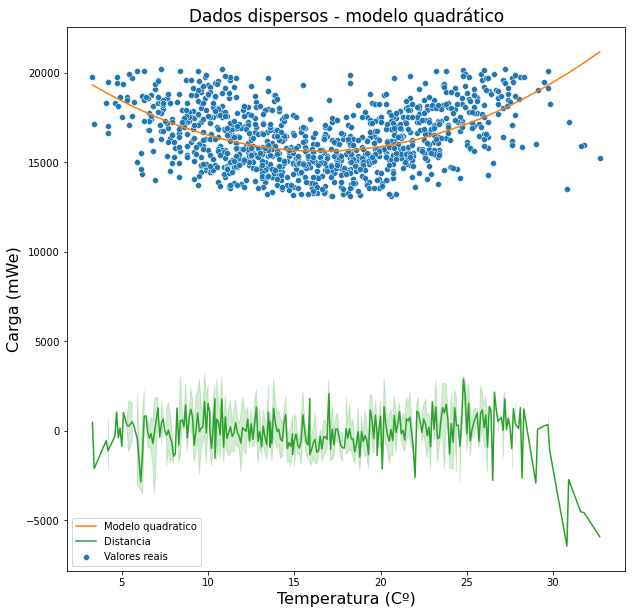

In [144]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="temp_arg", y="mean", data=df_gera, color='#1f77b4', label='Valores reais')
sns.lineplot(x=df_gera['temp_arg'].to_numpy(), y=modelo_qd.fittedvalues.to_numpy(), color='#ff7f0e', label='Modelo quadratico')
sns.lineplot(x=df_gera['temp_arg'].to_numpy(), y=df_gera['mean'].to_numpy() - modelo_qd.fittedvalues.to_numpy(), color='#2ca02c', label='Distancia')
plt.title('Dados dispersos - modelo quadrático', fontsize=17)
plt.xlabel('Temperatura (Cº)', fontsize=16)
plt.ylabel('Carga (mWe)', fontsize=16)
plt.legend()
plt.show()

In [135]:
df_gera['yhat_qd'] = (modelo_qd.fittedvalues)

#Visualizando os dois fitted values no dataset
#modelos 'modelo_step_empresas e modelo_step_empresas_bc
df_gera[['data','mean','yhat_OLS','yhat_bc', 'yhat_qd']]

,data,mean,yhat_OLS,yhat_bc,yhat_qd
3,2020-05-04,13317.416667,16328.075272,16208.389133,15788.585275
4,2020-05-05,13904.625000,16323.934247,16204.470451,15839.724718
5,2020-05-06,14717.125000,16299.088092,16180.986223,16288.958286
6,2020-05-07,14865.875000,16314.616939,16195.658270,15979.580783
7,2020-05-08,14666.333333,16324.969503,16205.449997,15826.304156
...,...,...,...,...,...
1192,2023-08-06,14927.958333,16346.709888,16226.039650,15642.370252
1193,2023-08-07,17602.625000,16289.770785,16172.191936,16520.355225
1194,2023-08-08,17595.833333,16300.123349,16181.963780,16265.366517
1195,2023-08-09,18150.958333,16320.828477,16201.532311,15882.529203


<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

<AxesSubplot:xlabel='temp_arg', ylabel='mean'>

Text(0.5, 1.0, 'Dispersão dos dados modelo Box-Cox')

Text(0.5, 0, 'Temperatura (Cº)')

Text(0, 0.5, 'Carga (mWe)')

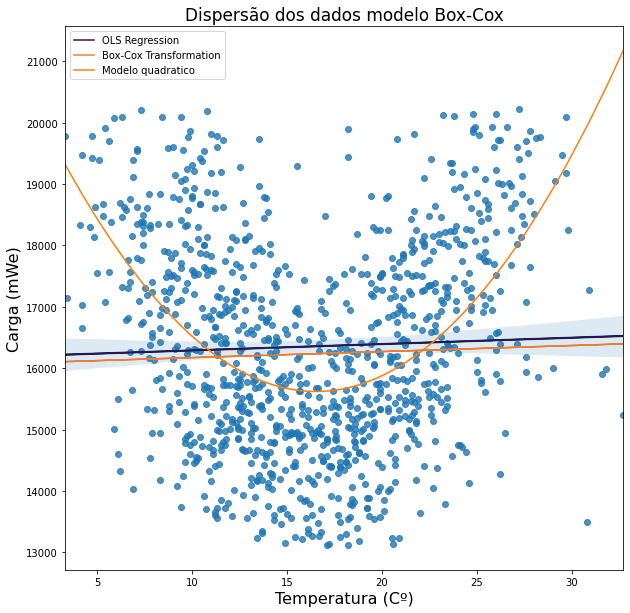

In [145]:


plt.figure(figsize=(10, 10))
sns.regplot(x="temp_arg", y="mean", data=df_gera)
plt.plot(df_gera['temp_arg'].to_numpy(), modelo_OLS.fittedvalues.to_numpy(), color='#2e1547', label='OLS Regression')
plt.plot(df_gera['temp_arg'].to_numpy(), Ybc, color='#ed7d31', label='Box-Cox Transformation')
sns.lineplot(x=df_gera['temp_arg'].to_numpy(), y=modelo_qd.fittedvalues.to_numpy(), color='#ff7f0e', label='Modelo quadratico')
plt.legend()
plt.title('Dispersão dos dados modelo Box-Cox', fontsize=17)
plt.xlabel('Temperatura (Cº)', fontsize=16)
plt.ylabel('Carga (mWe)', fontsize=16)
plt.show()

In [138]:
# Verificando a normalidade dos resíduos do 'modelo_OLS' e 'modelo_bc2'
from sfrancia import shapiroFrancia
# Teste de Shapiro-Francia
sf_test_ols = shapiroFrancia(modelo_OLS.resid.to_numpy())
sf_test_qd = shapiroFrancia(modelo_qd.resid.to_numpy())
sf_test_bc = shapiroFrancia(modelo_bc.resid.to_numpy())

print("p-value ols:", sf_test_ols['p-value'])
print("p-value bc:", sf_test_bc['p-value'])
print("p-value qd:", sf_test_qd['p-value'])


p-value ols: 6.020369849474729e-10
p-value bc: 8.221629997109263e-08
p-value qd: 0.0001504765859807025


(array([5.81735834e-05, 1.00481644e-04, 8.72603751e-05, 1.40145451e-04,
        2.03607542e-04, 2.40627095e-04, 2.30050080e-04, 2.16828811e-04,
        1.77165004e-04, 1.79809258e-04, 1.82453512e-04, 1.74520750e-04,
        1.66587989e-04, 1.37501197e-04, 1.29568436e-04, 1.03125898e-04,
        6.61063448e-05, 5.81735834e-05, 8.46161213e-05, 3.43752993e-05]),
 array([-3270.42463193, -2909.56726006, -2548.7098882 , -2187.85251633,
        -1826.99514447, -1466.13777261, -1105.28040074,  -744.42302888,
         -383.56565702,   -22.70828515,   338.14908671,   699.00645858,
         1059.86383044,  1420.7212023 ,  1781.57857417,  2142.43594603,
         2503.29331789,  2864.15068976,  3225.00806162,  3585.86543349,
         3946.72280535]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Resíduos')

Text(0, 0.5, 'Densidade')

Text(0.5, 1.0, 'Resísuos modelo OLS')

Text(0.05, 0.7, 'Shapiro-Francia p-value: 0.0000')

(array([  47.86881023,   47.86881023,   47.86881023,  191.47524092,
         430.81929206, 1196.72025573, 1388.19549664, 2201.96527054,
        2632.7845626 , 4451.79935131, 7515.40320597, 6079.3388991 ,
        5409.17555589, 5887.86365818, 5887.86365818, 3781.6360081 ,
        3829.50481833, 2489.17813191, 1914.75240916, 1675.40835802]),
 array([-2.19170403e-04, -2.01659565e-04, -1.84148728e-04, -1.66637890e-04,
        -1.49127052e-04, -1.31616214e-04, -1.14105377e-04, -9.65945390e-05,
        -7.90837013e-05, -6.15728636e-05, -4.40620258e-05, -2.65511881e-05,
        -9.04035042e-06,  8.47048729e-06,  2.59813250e-05,  4.34921627e-05,
         6.10030004e-05,  7.85138381e-05,  9.60246758e-05,  1.13535514e-04,
         1.31046351e-04]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Resíduos')

Text(0, 0.5, 'Densidade')

Text(0.5, 1.0, 'Resíduos modelo Box-Cox ')

Text(0.05, 0.7, 'Shapiro-Francia p-value: 0.0000')

(array([3.57639283e-06, 0.00000000e+00, 0.00000000e+00, 3.57639283e-06,
        0.00000000e+00, 7.15278567e-06, 1.96701606e-05, 8.22570352e-05,
        1.35902928e-04, 1.82396035e-04, 2.75382248e-04, 2.46771106e-04,
        2.25312749e-04, 2.18159963e-04, 1.75243249e-04, 1.30538338e-04,
        8.04688388e-05, 5.36458925e-05, 2.50347498e-05, 8.94098209e-06]),
 array([-6450.69505024, -5917.08561896, -5383.47618768, -4849.8667564 ,
        -4316.25732511, -3782.64789383, -3249.03846255, -2715.42903127,
        -2181.81959999, -1648.21016871, -1114.60073743,  -580.99130615,
          -47.38187487,   486.22755642,  1019.8369877 ,  1553.44641898,
         2087.05585026,  2620.66528154,  3154.27471282,  3687.8841441 ,
         4221.49357538]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Resíduos')

Text(0, 0.5, 'Densidade')

Text(0.5, 1.0, 'Resísuos modelo quadrático')

Text(0.05, 0.7, 'Shapiro-Francia p-value: 0.0002')

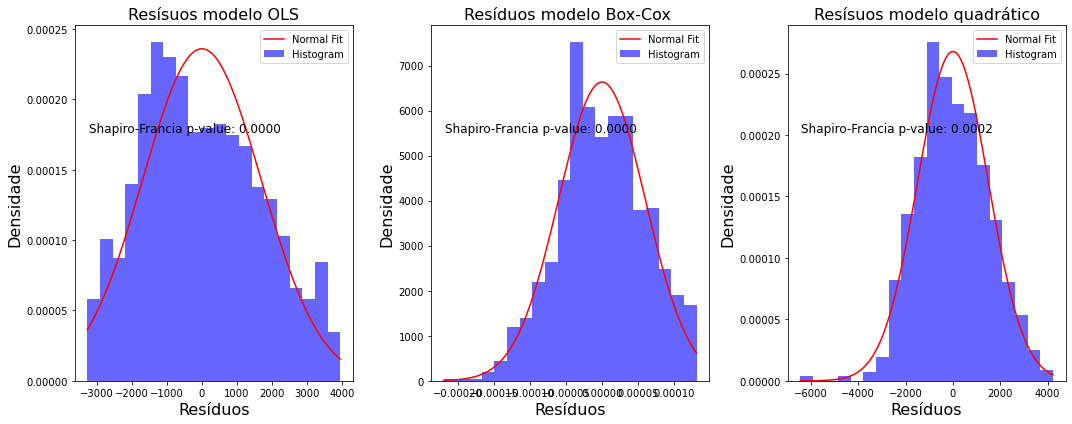

In [139]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Resíduos dos modelos
resid_array_ols = modelo_OLS.resid.to_numpy()
resid_array_qd = modelo_qd.resid.to_numpy()
resid_array_bc = modelo_bc.resid.to_numpy()

# setando a figura com subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Plot OLS
ax = axes[0]
ax.hist(resid_array_ols, bins=20, density=True, color='blue', alpha=0.6, label='Histogram')
x_range_ols = np.linspace(min(resid_array_ols), max(resid_array_ols), 100)
mu_ols, std_ols = norm.fit(resid_array_ols)
pdf_ols = norm.pdf(x_range_ols, mu_ols, std_ols)
ax.plot(x_range_ols, pdf_ols, label="Normal Fit", color='red')
ax.set_xlabel('Resíduos', fontsize=16)
ax.set_ylabel('Densidade', fontsize=16)
ax.set_title('Resísuos modelo OLS', fontsize=16)
ax.annotate(f"Shapiro-Francia p-value: {sf_test_ols['p-value']:.4f}",
            xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12)
ax.legend()

# Plot of BOX-COX
ax = axes[1]
ax.hist(resid_array_bc2, bins=20, density=True, color='blue', alpha=0.6, label='Histogram')
x_range_bc2 = np.linspace(min(resid_array_bc2), max(resid_array_bc2), 100)
mu_bc2, std_bc2 = norm.fit(resid_array_bc2)
pdf_bc2 = norm.pdf(x_range_bc2, mu_bc2, std_bc2)
ax.plot(x_range_bc2, pdf_bc2, label="Normal Fit", color='red')
ax.set_xlabel('Resíduos', fontsize=16)
ax.set_ylabel('Densidade', fontsize=16)
ax.set_title('Resíduos modelo Box-Cox ', fontsize=16)
ax.annotate(f"Shapiro-Francia p-value: {sf_test_bc['p-value']:.4f}",
            xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12)
ax.legend()

# Plot OLS Quadrático
ax = axes[2]
ax.hist(resid_array_qd, bins=20, density=True, color='blue', alpha=0.6, label='Histogram')
x_range_qd = np.linspace(min(resid_array_qd), max(resid_array_qd), 100)
mu_qd, std_qd = norm.fit(resid_array_qd)
pdf_qd = norm.pdf(x_range_qd, mu_qd, std_qd)
ax.plot(x_range_qd, pdf_qd, label="Normal Fit", color='red')
ax.set_xlabel('Resíduos', fontsize=16)
ax.set_ylabel('Densidade', fontsize=16)
ax.set_title('Resísuos modelo quadrático', fontsize=16)
ax.annotate(f"Shapiro-Francia p-value: {sf_test_qd['p-value']:.4f}",
            xy=(0.05, 0.7), xycoords='axes fraction', fontsize=12)
ax.legend()



# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [140]:
# Resumo dos  três modelos obtidos
#(linear e com Box-Cox)

summary_col([modelo_OLS, modelo_bc2, modelo_qd],
            model_names=["OLS","STEPWISE BOX-COX","OLS QUADRATICO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,OLS,STEPWISE BOX-COX,OLS QUADRATICO
Intercept,16186.2451***,1.2610***,21401.1442***
,(154.1496),(0.0000),(329.3473)
R-squared,0.0013,0.0361,0.2253
R-squared Adj.,0.0003,0.0352,0.2238
"np.power(xdata, 2)",,,21.1900***
,,,(1.2191)
temp_arg,10.3526,0.0000***,
,(8.8764),(0.0000),
xdata,,,-699.9791***
,,,(41.6096)


<Figure size 720x720 with 0 Axes>

Text(0.5, 0, 'Carga')

Text(0, 0.5, 'Valores preditos')

Text(0.5, 1.0, 'Dispersão e valores preditos')

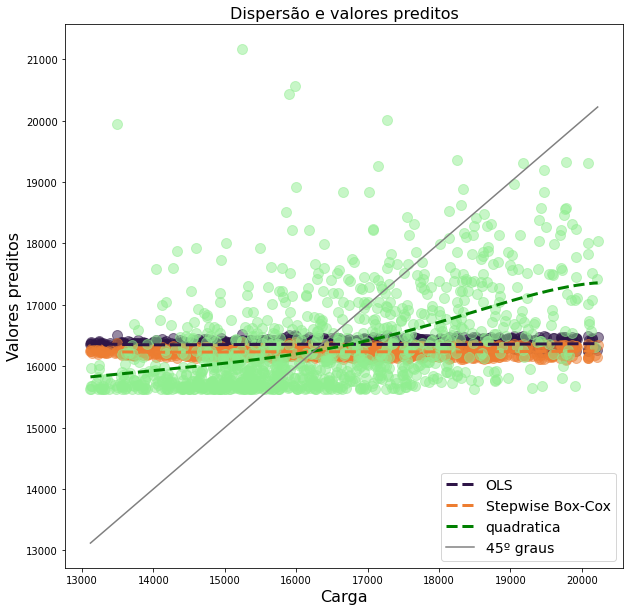

In [141]:
from scipy.optimize import curve_fit

def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

xdata = df_gera['mean'].to_numpy()  # Convert to Numpy array
ydata_linear = df_gera['yhat_OLS'].to_numpy()  # Convert to Numpy array
ydata_bc = df_gera['yhat_bc'].to_numpy()  # Convert to Numpy array
ydata_qd = df_gera['yhat_qd'].to_numpy()  # Convert to Numpy array

plt.figure(figsize=(10, 10))

popt, _ = curve_fit(objective, xdata, ydata_linear)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#2e1547', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_bc)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#ed7d31', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_qd)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='green', linewidth=3)

plt.plot(x_line, x_line, color='gray', linestyle='-')
plt.scatter(xdata, ydata_linear, alpha=0.5, s=100, color='#2e1547')
plt.scatter(xdata, ydata_bc, alpha=0.5, s=100, color='#ed7d31')
plt.scatter(xdata, ydata_qd, alpha=0.5, s=100, color='lightgreen')
plt.xlabel('Carga', fontsize=16)
plt.ylabel('Valores preditos', fontsize=16)
plt.legend(['OLS', 'Stepwise Box-Cox', 'quadratica', '45º graus'], fontsize=14)
plt.title('Dispersão e valores preditos', fontsize=16)
plt.show()